In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [61]:
sh = pd.read_csv('score.csv')

In [7]:
sh.shape

(25, 2)

In [10]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
sh.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


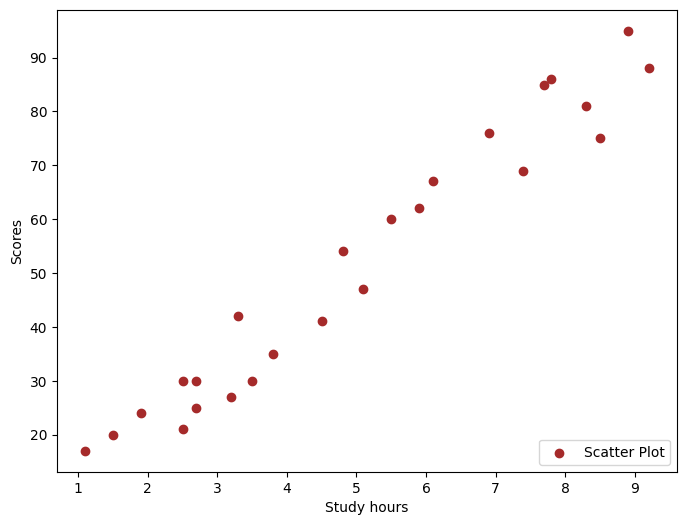

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(sh['Hours'], sh['Scores'], color = 'brown', label='Scatter Plot')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()


In [58]:
sh.drop_duplicates(inplace=True)

In [87]:
x=sh.iloc[:,:-1].values
print(x)
y=sh.iloc[:,-1].values.reshape(-1,1)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [88]:
print(x.shape)
print(y.shape)

(25, 1)
(25, 1)


In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2)


In [90]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


# Build the model

In [93]:
import statsmodels.api as sm

# Step 1: Add a constant to the predictor (hours) for the intercept
X_const = sm.add_constant(X_train)  # Adds a constant term to the predictor
# Step 2: Fit the OLS model
ols_model = sm.OLS(Y_train, X_const).fit()

# Step 3: Print out the OLS model summary for insights
print(ols_model.summary())

'''
Explanation of Key OLS Summary Outputs
Coefficients: Show the intercept and slope(s) for predictors.
P-value: Tells us the significance of each coefficient. A lower p-value (< 0.05) generally indicates that the predictor is statistically significant.
R-squared: Indicates how well the model explains the variance in the data (similar to what r2_score gives in sklearn).
Confidence Intervals: Provide a range for each coefficient, which is useful for understanding the variability.
'''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     378.6
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.55e-13
Time:                        05:53:13   Log-Likelihood:                -61.305
No. Observations:                  20   AIC:                             126.6
Df Residuals:                      18   BIC:                             128.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1514      2.955      0.051      0.9

'\nExplanation of Key OLS Summary Outputs\nCoefficients: Show the intercept and slope(s) for predictors.\nP-value: Tells us the significance of each coefficient. A lower p-value (< 0.05) generally indicates that the predictor is statistically significant.\nR-squared: Indicates how well the model explains the variance in the data (similar to what r2_score gives in sklearn).\nConfidence Intervals: Provide a range for each coefficient, which is useful for understanding the variability.\n'

In [94]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# Test the model

In [70]:
model.coef_


array([[10.04071349]])

In [97]:
Y_pred = model.predict(X_test)
print(X_test)
Y_pred

[[3.3]
 [1.1]
 [1.9]
 [7.7]
 [7.4]]


array([[33.40461575],
       [11.23583192],
       [19.29720786],
       [77.7421834 ],
       [74.71916743]])

 In machine learning, prediction methods typically expect input in the form of an array, even if there's only one feature (like study hours in this case).

# **Predicting study hours**

In [102]:
hrs = int(input("Enter study hours: "))
score = model.predict(np.array([[hrs]])) # Reshape the input to a 2D array
# np.array([[hrs]]): This creates a 2D array with one row and one column, which is what predict() expects.

print("Study hours = ", hrs, "\nPredicted score = ", score)

Enter study hours: 5
Study hours =  5 
Predicted score =  [[50.53503962]]


In [71]:
model.intercept_


array([1.49521116])

In [72]:
Y_test[:4]


array([[47],
       [88],
       [41],
       [54]])

In [73]:
Y_pred=model.predict(X_test)
Y_pred[:4]

array([[52.70284994],
       [93.86977524],
       [46.67842185],
       [49.6906359 ]])

In [74]:
df2=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df2

,Actual,Predicted
0,47,52.702850
1,88,93.869775
2,41,46.678422
3,54,49.690636
4,17,12.539996


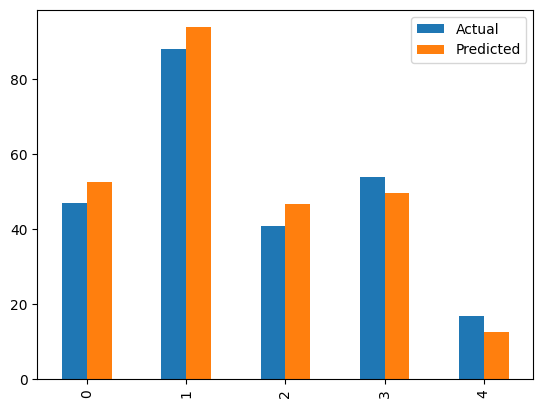

In [75]:
df2.plot(kind='bar')
plt.show()

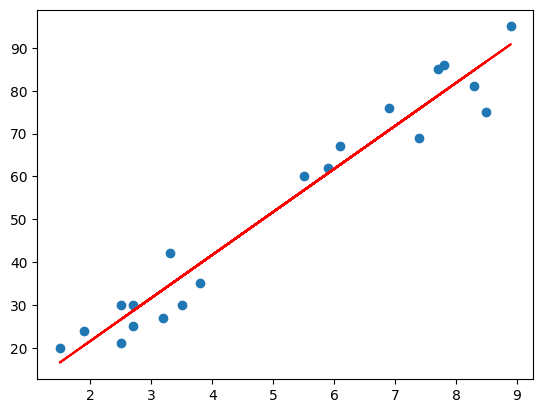

In [76]:
# for training data
plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()


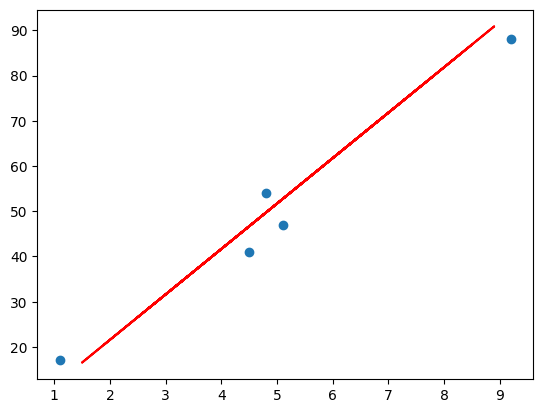

In [77]:
# for testing data
plt.scatter(X_test,Y_test)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

In [80]:
# Accuracy for training data
r2_score(Y_train,model.predict(X_train))

0.9528464502300444

In [81]:
# Accuracy for testing data
r2_score(Y_test,Y_pred)

0.9477917911864493